# R-CNN

## Setup

In [1]:
# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Verify installation
import torch
print(torch.__version__)
assert torch.cuda.is_available(), "CUDA is not available. Please use a GPU runtime in Colab."


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1l8q0if7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1l8q0if7
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
2.5.1+cu121


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install opencv-python-headless pycocotools matplotlib

## Python Code for Conversion

Here’s a Python script to convert YOLO-format data to COCO-format JSON:

In [ ]:
import os
import json
import cv2

# Define your dataset directories
yolo_labels_dir = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/labels"  
train_images_dir = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/images"  
train_json_path = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/coco_annotations.json"

# Define your class names in order (matching your YOLO format)
classes = ['flower', 'leaf', 'pla-', 'plant', 'pot', 'root', 'stem']

# Initialize COCO JSON format
coco_format = {
    "images": [],
    "annotations": [],
    "categories": []
}

# Add categories to COCO JSON
for i, class_name in enumerate(classes):
    coco_format["categories"].append({
        "id": i + 1,
        "name": class_name,
        "supercategory": "none"
    })

# Helper function to convert YOLO bbox to COCO bbox
def yolo_to_coco_bbox(yolo_bbox, img_width, img_height):
    x_center, y_center, width, height = yolo_bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)
    return [x_min, y_min, width, height]

# Loop through YOLO labels
annotation_id = 0
image_id = 0

for label_file in os.listdir(yolo_labels_dir):
    if not label_file.endswith(".txt"):
        continue

    # Read corresponding image
    image_name = label_file.replace(".txt", ".jpg")  
    image_path = os.path.join(train_images_dir, image_name)
    if not os.path.exists(image_path):
        print(f"Image {image_path} not found, skipping...")
        continue

    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Add image info to COCO JSON
    coco_format["images"].append({
        "id": image_id,
        "file_name": image_name,
        "height": height,
        "width": width
    })

    # Read YOLO label file
    label_path = os.path.join(yolo_labels_dir, label_file)
    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            yolo_bbox = list(map(float, parts[1:5]))
            segmentation = []  # Add polygon segmentation

            # Convert YOLO bbox to COCO format
            coco_bbox = yolo_to_coco_bbox(yolo_bbox, width, height)
            area = coco_bbox[2] * coco_bbox[3]  # Area = width * height

            # Add annotation to COCO JSON
            coco_format["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": class_id + 1,  
                "bbox": coco_bbox,
                "segmentation": segmentation,  
                "area": area,
                "iscrowd": 0
            })
            annotation_id += 1

    image_id += 1

# Save COCO JSON
with open(train_json_path, "w") as f:
    json.dump(coco_format, f, indent=4)

print(f"COCO annotations saved to {train_json_path}")


COCO annotations saved to /content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/coco_annotations.json


In [ ]:
import os
import json
import cv2

# Define your dataset directories
yolo_labels_dir = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/labels"  # Path to YOLO annotation files (e.g., train/labels/)
valid_images_dir = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/images"  # Path to images (e.g., train/images/)
valid_json_path = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/coco_annotations.json"

# Define your class names in order (matching your YOLO format)
classes = ['flower', 'leaf', 'pla-', 'plant', 'pot', 'root', 'stem']

# Initialize COCO JSON format
coco_format = {
    "images": [],
    "annotations": [],
    "categories": []
}

# Add categories to COCO JSON
for i, class_name in enumerate(classes):
    coco_format["categories"].append({
        "id": i + 1,
        "name": class_name,
        "supercategory": "none"
    })

# Helper function to convert YOLO bbox to COCO bbox
def yolo_to_coco_bbox(yolo_bbox, img_width, img_height):
    x_center, y_center, width, height = yolo_bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)
    return [x_min, y_min, width, height]

# Loop through YOLO labels
annotation_id = 0
image_id = 0

for label_file in os.listdir(yolo_labels_dir):
    if not label_file.endswith(".txt"):
        continue

    # Read corresponding image
    image_name = label_file.replace(".txt", ".jpg")  # Update for your image format if needed
    image_path = os.path.join(valid_images_dir, image_name)
    if not os.path.exists(image_path):
        print(f"Image {image_path} not found, skipping...")
        continue

    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Add image info to COCO JSON
    coco_format["images"].append({
        "id": image_id,
        "file_name": image_name,
        "height": height,
        "width": width
    })

    # Read YOLO label file
    label_path = os.path.join(yolo_labels_dir, label_file)
    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            yolo_bbox = list(map(float, parts[1:5]))
            segmentation = []  # Add polygon segmentation if available

            # Convert YOLO bbox to COCO format
            coco_bbox = yolo_to_coco_bbox(yolo_bbox, width, height)
            area = coco_bbox[2] * coco_bbox[3]  # Area = width * height

            # Add annotation to COCO JSON
            coco_format["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": class_id + 1,  # COCO IDs start from 1
                "bbox": coco_bbox,
                "segmentation": segmentation,  # Add polygon points if available
                "area": area,
                "iscrowd": 0
            })
            annotation_id += 1

    image_id += 1

# Save COCO JSON
with open(valid_json_path, "w") as f:
    json.dump(coco_format, f, indent=4)

print(f"COCO annotations saved to {valid_json_path}")


COCO annotations saved to /content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/coco_annotations.json


## Traning Model

In [5]:
from detectron2.model_zoo import get_config_file

cfg.merge_from_file(get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))


In [8]:
!wget https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl


--2024-12-02 17:45:16--  https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.38, 13.35.7.50, 13.35.7.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177841981 (170M) [application/octet-stream]
Saving to: ‘model_final_f10217.pkl’

model_final_f10217. 100%[===================>] 169.60M  82.8MB/s    in 2.0s    

2024-12-02 17:45:18 (82.8 MB/s) - ‘model_final_f10217.pkl’ saved [177841981/177841981]



[12/02 17:47:05 d2.data.datasets.coco]: Loaded 671 images in COCO format from /content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/coco_annotations.json


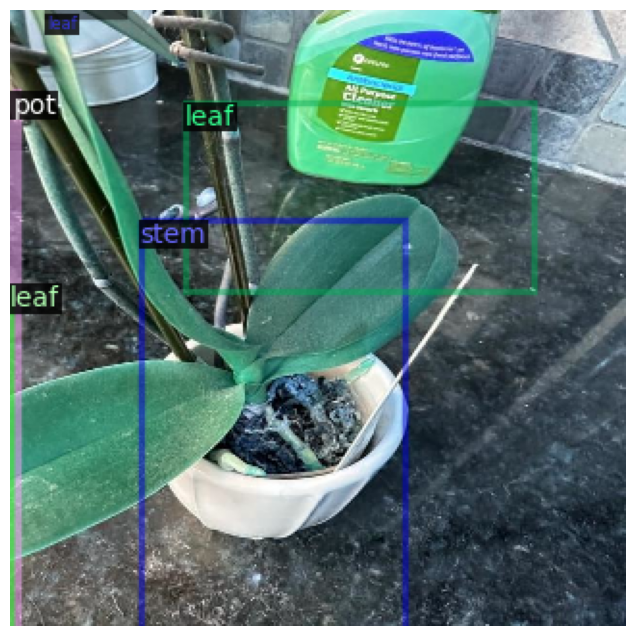

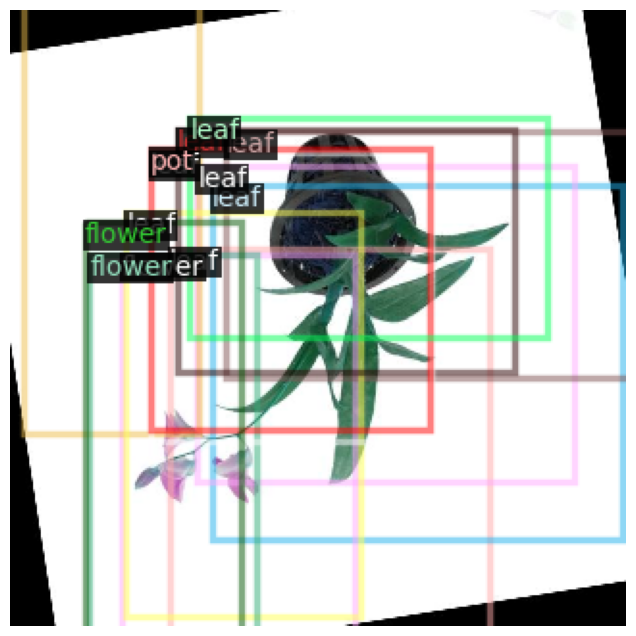

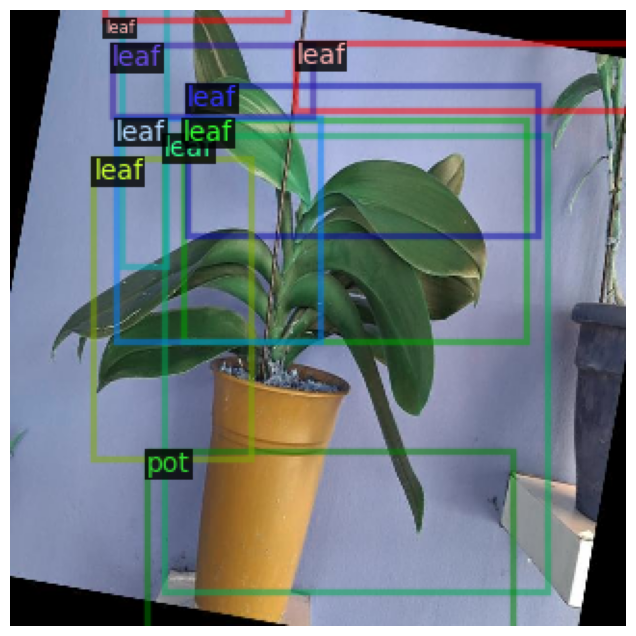

AssertionError: Config file 'detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml' does not exist!

In [10]:
# Import necessary libraries
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2

# Define dataset paths
train_images = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/images"
train_annotations = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/train/coco_annotations.json"
val_images = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/images"
val_annotations = "/content/drive/MyDrive/SLIIT/Y4S1/Research/Dataset/valid/coco_annotations.json"

# Register the dataset in Detectron2
register_coco_instances("orchid_train", {}, train_annotations, train_images)
register_coco_instances("orchid_val", {}, val_annotations, val_images)

# Verify dataset registration
metadata = MetadataCatalog.get("orchid_train")
dataset_dicts = DatasetCatalog.get("orchid_train")

# Visualize a few samples
import random
import matplotlib.pyplot as plt

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(12, 8))
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.axis('off')
    plt.show()

# Configure the model
cfg = get_cfg()
cfg.merge_from_file("detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Use Mask R-CNN with ResNet-50 backbone
cfg.DATASETS.TRAIN = ("orchid_train",)
cfg.DATASETS.TEST = ("orchid_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # Pretrained weights
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 3000  # Adjust based on dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7  # Update this with the number of classes in your dataset

# Output directory
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Save the trained weights
trained_weights = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
print(f"Trained weights saved at {trained_weights}")
